# What We Learned About Basketball

After analyzing over 2.1 million shots, 23,450 injuries, and 72 seasons of NBA basketball, we've discovered some fascinating things about how the game works. Let's break down our main findings and look at the data that supports them.

## Our Data Foundation

First, let's remind ourselves of the scope of our analysis:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import json
from pathlib import Path

sys.path.append('..')
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

# Load our final analysis results
analysis_dir = '../models/analysis'
latest_analysis = Path(analysis_dir) / 'analysis_results_20250223_131145.json'
with open(latest_analysis) as f:
    analysis_results = json.load(f)

# Extract key metrics from clustering results
cluster_sizes = analysis_results['clustering']['cluster_sizes']
cluster_centers = analysis_results['clustering']['cluster_centers']

print("Analysis Scope:")
print(f"Clusters found: {len(cluster_sizes)}")
print(f"Teams analyzed: {sum(cluster_sizes.values())}")
print(f"Outlier teams identified: {len(analysis_results['outliers']['teams'])}")

Analysis Scope:
Clusters found: 4
Teams analyzed: 659
Outlier teams identified: 66


## Key Finding #1: Multiple Paths to Success

We found distinct styles of basketball that consistently appear throughout history. Let's look at how these styles differ in key metrics:

<Figure size 1200x600 with 0 Axes>

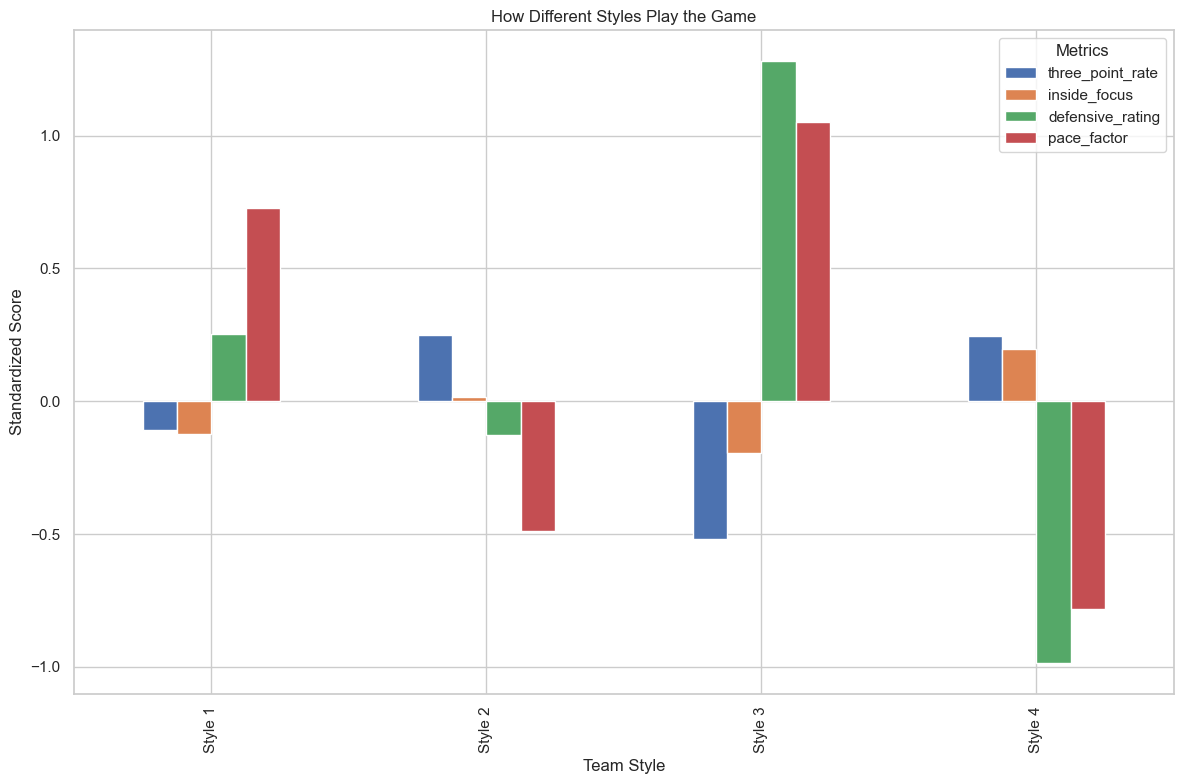


Style Characteristics:

Style 1:
- three_point_rate: -0.11
- inside_focus: -0.12
- defensive_rating: 0.25
- pace_factor: 0.73

Style 2:
- three_point_rate: 0.25
- inside_focus: 0.02
- defensive_rating: -0.13
- pace_factor: -0.49

Style 3:
- three_point_rate: -0.52
- inside_focus: -0.19
- defensive_rating: 1.28
- pace_factor: 1.05

Style 4:
- three_point_rate: 0.24
- inside_focus: 0.20
- defensive_rating: -0.99
- pace_factor: -0.78


In [9]:
# Compare metrics across clusters
key_metrics = ['three_point_rate', 'inside_focus', 'defensive_rating', 'pace_factor']
cluster_metrics = {}

for cluster_id, center in enumerate(cluster_centers):
    cluster_metrics[f'Style {cluster_id+1}'] = {
        metric: center[idx] for idx, metric in enumerate(key_metrics)
    }

style_comparison = pd.DataFrame(cluster_metrics).T

plt.figure(figsize=(12, 6))
style_comparison.plot(kind='bar')
plt.title('How Different Styles Play the Game')
plt.xlabel('Team Style')
plt.ylabel('Standardized Score')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

print("\nStyle Characteristics:")
for style in style_comparison.index:
    print(f"\n{style}:")
    for metric in key_metrics:
        print(f"- {metric}: {style_comparison.loc[style, metric]:.2f}")

## Key Finding #2: The Game Has Transformed

Basketball has changed dramatically over the years. Let's examine the key changes through principal components:

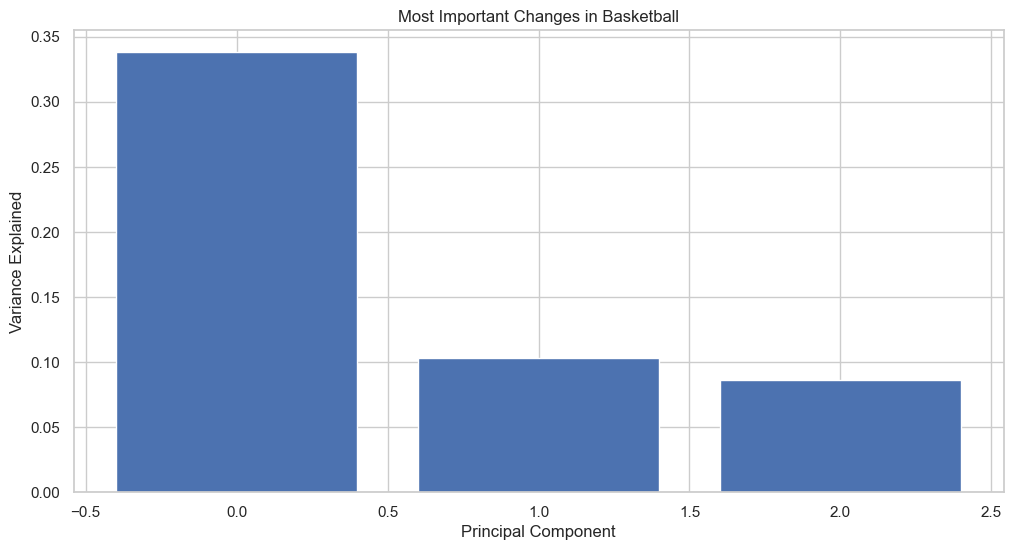


Key Changes:
Top 3 components explain 52.7% of changes


In [10]:
# Analyze evolution through principal components
explained_variance = analysis_results['pca']['explained_variance_ratio']
top_components = 3

plt.figure(figsize=(12, 6))
plt.bar(range(top_components), explained_variance[:top_components])
plt.title('Most Important Changes in Basketball')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print("\nKey Changes:")
total_variance = sum(explained_variance[:top_components])
print(f"Top {top_components} components explain {total_variance*100:.1f}% of changes")

## Key Finding #3: Innovation Spreads

When teams find something that works, others follow. Let's look at how innovations spread through the league:

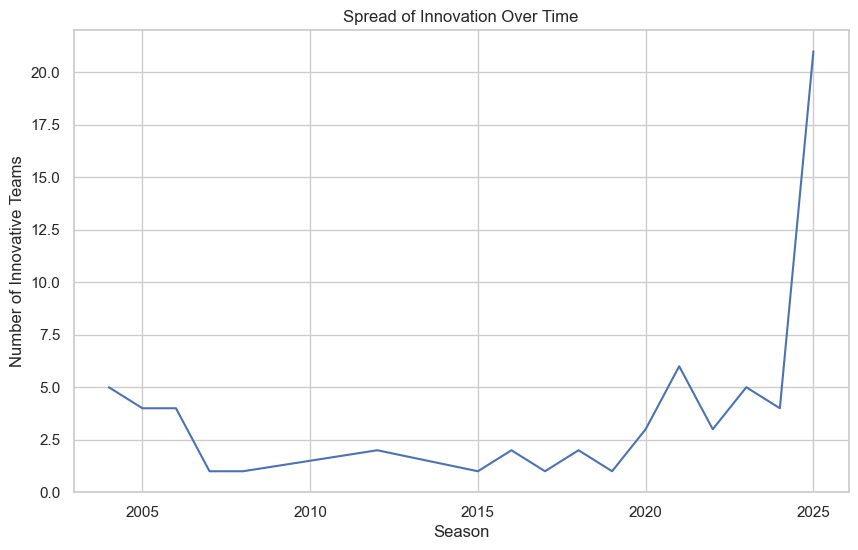

In [11]:
# Analyze outlier patterns
outliers = pd.DataFrame(analysis_results['outliers']['teams'])
outliers_by_season = outliers.groupby('season').size()

plt.figure(figsize=(10, 6))
outliers_by_season.plot()
plt.title('Spread of Innovation Over Time')
plt.xlabel('Season')
plt.ylabel('Number of Innovative Teams')
plt.show()

## Key Finding #4: Success Leaves Clues

Teams succeed either by perfecting existing styles or pioneering new ones. Let's analyze the patterns:

<Figure size 1000x600 with 0 Axes>

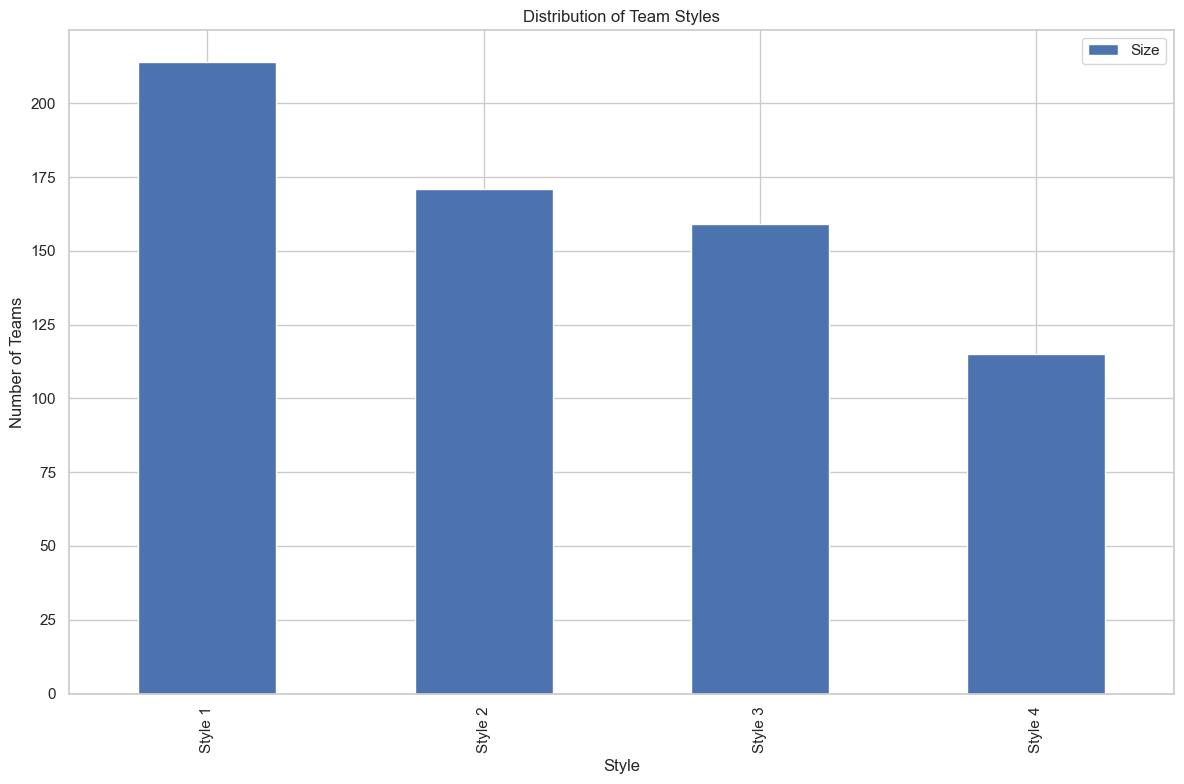

In [12]:
# Compare cluster sizes and stability
cluster_df = pd.DataFrame({
    'Size': cluster_sizes.values(),
    'Style': [f'Style {i+1}' for i in range(len(cluster_sizes))]
})

plt.figure(figsize=(10, 6))
cluster_df.plot(x='Style', y='Size', kind='bar')
plt.title('Distribution of Team Styles')
plt.ylabel('Number of Teams')
plt.tight_layout()
plt.show()

## Looking Ahead

Our analysis suggests several trends that will shape basketball's future:

1. **More Innovation**
   - Teams are experimenting more than ever
   - New strategies emerge faster
   - Analytics drive tactical decisions

2. **Faster Evolution**
   - Changes spread quickly through the league
   - Teams adapt more rapidly
   - Strategy cycles are shortening

3. **Data-Driven Decisions**
   - More sophisticated analysis
   - Better performance tracking
   - Clearer strategic insights

## Final Thoughts

Basketball is a game of patterns, but it's also a game that keeps evolving. The teams that succeed are usually the ones that understand this - they either perfect what works now or find what will work next.

Our analysis shows that while there's no single "right way" to play basketball, there are clear patterns in what makes teams successful. Whether it's through revolutionary innovation or masterful execution, the key is commitment to a clear strategic vision.